# Playground 

A place to quickly test and experiment.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.special as sp
import sys

from matplotlib import rc
rc('text', usetex=True)

### Bessel Functions

First kind of real order and complex argument.

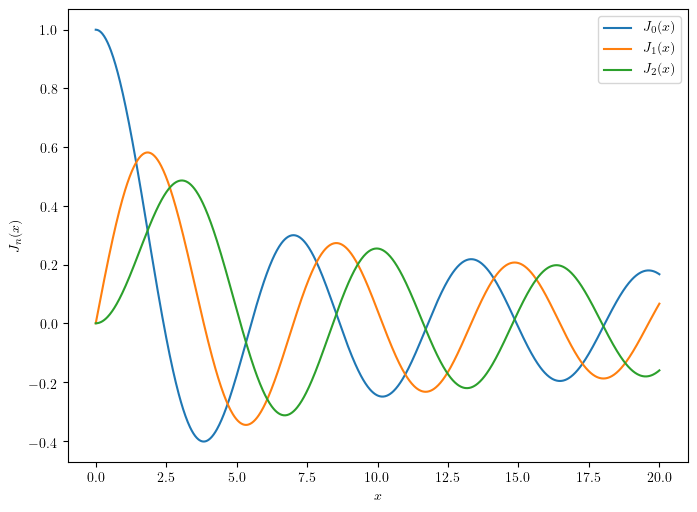

In [2]:
x = np.linspace(0,20,1000)

fig = plt.figure(figsize=(8,6), dpi= 100)

for a in range(0,3):
    plt.plot(x, sp.jv(a,x), label=f'$J_{a}(x)$')
    
plt.xlabel('$x$')
plt.ylabel('$J_n(x)$')
plt.legend()

plt.show()

Second kind of real order and complex argument.

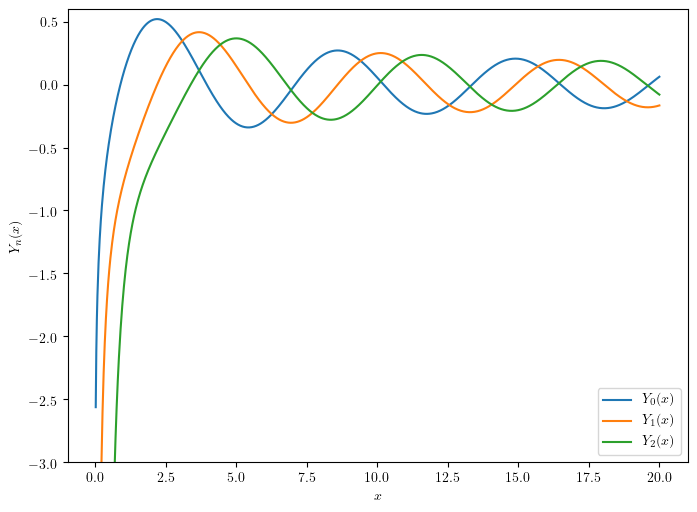

In [4]:
fig = plt.figure(figsize=(8,6), dpi= 100)

for a in range(0,3):
    plt.plot(x, sp.yn(a,x), label=f'$Y_{a}(x)$')

plt.xlabel('$x$')
plt.ylabel('$Y_n(x)$')

plt.ylim((-3, 0.6))

plt.legend()

plt.show()

### Derivatives using FFT

Differentiate $sin(x)$

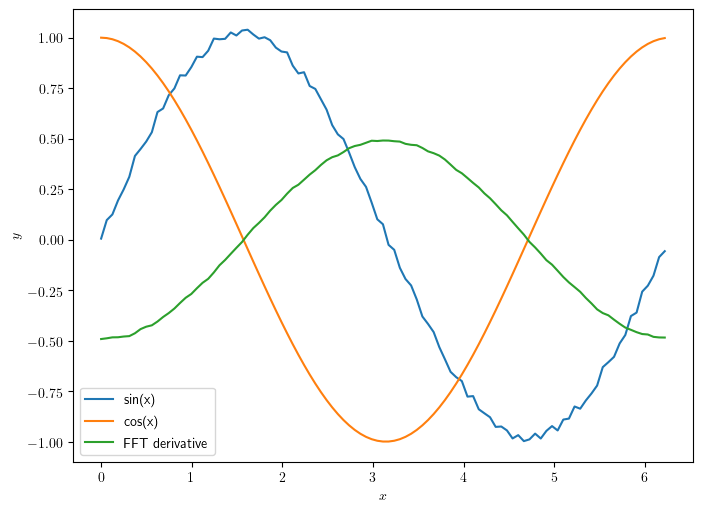

In [60]:
# create "artificial" data

N = 101
L = 2 * np.pi

x = np.arange(0., L, L/float(N))
y = np.sin(x) + 0.05 * np.random.random(np.shape(x)) # artificial data

dy_analytical = np.cos(x) # exact derivative

if N % 2 == 0:
    k = np.arange(-N/2 + 1, N/2 + 1, 1)
#     k = np.asarray([range(0, int(N / 2)), range(-int(N / 2 + 1),0)])
#     k = np.asarray([range(0, int(N / 2))] + [range(-int(N / 2) + 1,0)])
else:
    k = np.arange(-(N - 1) / 2, ((N - 1) / 2) + 1, 1)
#     k = np.asarray([range(0,int((N - 1) / 2)), range(-int((N - 1) / 2), 0)])
#     k = np.asarray([range(0,int((N - 1) / 2))] + [range(-int((N - 1) / 2), 0)])
    
# k = k.astype('float64') 

k *= 2 * np.pi / L

fftd = (1/N)*np.real(np.fft.ifft(1.0j * k * np.fft.fft(y))) # FFT derivative


# Plot 

fig = plt.figure(figsize=(8,6), dpi=100)

plt.plot(x, y, label = 'sin(x)')
plt.plot(x, dy_analytical, label = "cos(x)")
plt.plot(x, fftd, label = "FFT derivative")

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

plt.show()

Differentiate $f(x) = cos(x) e^{x^2 /25}$

In [76]:
n = 1000
L = 30

dx = L/n

x = np.arange(-L/2,L/2,dx,dtype="complex_") # domain

# Create a Function
f = np.cos(x) * np.exp(-np.power(x,2)/25)     

# Analytical derivative
df = -(np.sin(x) * np.exp(-np.power(x,2)/25 + (2/25)*x*f))  #Derivative

In [77]:
## Finite Difference Method

# Discretize the function into finite regions
dfFD = np.zeros(len(df), dtype='complex_')

# Iterate across array
for i in range(len(df)-1):
    dfFD[i]=(f[i+1]-f[i])/dx   
    
dfFD[-1] = dfFD[-2]

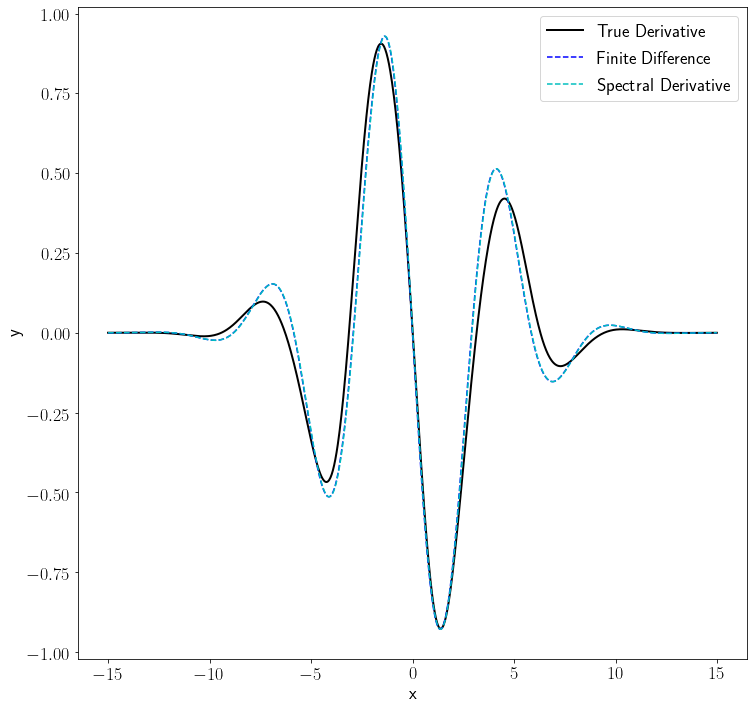

In [79]:
##Approximate derivative by FFT

fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)

#Re-order fft frequencies
kappa = np.fft.fftshift(kappa) 

#Obtain real part of the function for plotting
dfhat = kappa*fhat*(1j)

#Inverse Fourier Transform
dfFFT = np.real(np.fft.ifft(dfhat))

## Plot
plt.plot(x, df.real, color='k', LineWidth=2, label='True Derivative')
plt.plot(x, dfFD.real, '--', color='b', LineWidth=1.5, label='Finite Difference')
plt.plot(x, dfFFT.real, '--', color='c', LineWidth=1.5, label='Spectral Derivative')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()